## ICE 5

**Author**: Nicolás Dussaillant

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Create a dataset for testing

In [2]:
from sklearn.datasets import make_blobs # import make_blobs to help us simulate some data

twoDData, cluster_true, centers = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=17, return_centers=True, center_box=(-3., 3.))

print("Here are the first 10 rows of twoDData:")
print(twoDData[:10])
print("Here are the true labels for each observation. But we don't need it.")
print(cluster_true[:10])
print("Here are the centers:")
print(centers)

Here are the first 10 rows of twoDData:
[[ 0.8400745   0.46460341]
 [ 2.48099076  0.20689779]
 [-1.73913143 -2.70737482]
 [-0.96478425 -0.5209949 ]
 [ 0.12229533  0.29295907]
 [-1.50249993  0.94572916]
 [-1.66277952 -2.94818657]
 [ 0.25488308  0.86286632]
 [-1.92427332 -1.56644581]
 [-2.65246271 -3.00312923]]
Here are the true labels for each observation. But we don't need it.
[3 2 1 0 3 0 1 3 1 1]
Here are the centers:
[[-1.23200998  0.18352053]
 [-1.85087528 -2.59259785]
 [ 1.72191276  0.93800113]
 [ 0.82512538  0.45361736]]


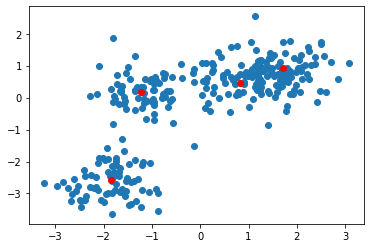

In [3]:
plt.scatter(twoDData[:, 0], twoDData[:, 1]);
plt.scatter(centers[:, 0], centers[:,1], c='red')

Cluster with k-means considering k=4

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(twoDData)
cluster_kmeans = kmeans.predict(twoDData)

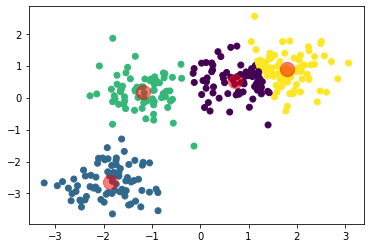

In [5]:
plt.scatter(twoDData[:, 0], twoDData[:, 1], c=cluster_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

## Silhoutte Coefficient and Silhoutte Plot


In [6]:
from sklearn.metrics import silhouette_score

silhouetteScore = silhouette_score(twoDData, cluster_kmeans, metric='euclidean')

# Print the score
print('Silhouetter Score:', silhouetteScore)

Silhouetter Score: 0.4885051806242588


In [7]:
from yellowbrick.cluster import SilhouetteVisualizer

In [8]:
smodel = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(smodel, colors='yellowbrick')

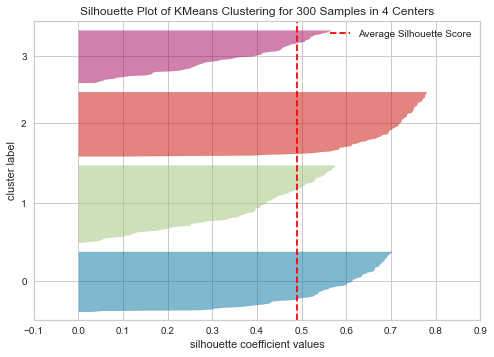

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 300 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [9]:
visualizer.fit(twoDData)
visualizer.show()

### Self-Reported Motivation

In [10]:
motivation = pd.read_csv("ICE5_Data.csv")
motivation

,id,motivation1,motivation2,motivation3,motivation4,motivation5
0,10005216,2,2.0,2,2.0,2.0
1,10033216,3,NaN,3,NaN,NaN
2,10004216,1,2.0,1,2.0,2.0
3,10008216,1,2.0,1,2.0,NaN
4,10026216,3,NaN,3,NaN,NaN
5,10014216,2,NaN,2,NaN,2.0
6,10021216,2,2.0,2,2.0,2.0
7,10013216,2,NaN,2,NaN,1.0
8,10035216,2,3.0,2,3.0,NaN
9,10015216,2,2.0,2,2.0,2.0


In [11]:
motivationNA = motivation.dropna()
motivationClean = motivationNA.drop(['id'], axis = 1)
motivationClean

,motivation1,motivation2,motivation3,motivation4,motivation5
0,2,2.0,2,2.0,2.0
2,1,2.0,1,2.0,2.0
6,2,2.0,2,2.0,2.0
9,2,2.0,2,2.0,2.0
11,2,1.0,2,1.0,2.0
13,2,3.0,2,3.0,1.0
14,1,1.0,1,1.0,4.0
16,1,1.0,1,1.0,3.0
17,1,1.0,1,1.0,1.0
18,1,1.0,1,1.0,1.0


In [14]:
motivationkmeans2 = KMeans(n_clusters=2)
motivationkmeans2.fit(motivationClean)
cluster_motivation2 = motivationkmeans2.predict(motivationClean)